In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem as ch
#import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


In [2]:
X = pd.read_csv('./no_zeros_no_chembl.csv')
y = X['pChemBL']
X.drop(columns='pChemBL',inplace=True)

<h3>Normalising between 0-1</h3>(in order for the autoencoder to work)

In [3]:
x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(data=x_scaled,columns=X.columns)
X.shape

(2861, 1208)

In [9]:
encoding_dim = 256
inputs = Input(shape=(1208,))

#hidden1 = Dense(600,activation='relu',activity_regularizer=regularizers.l2(10e-5))(inputs)
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l2(10e-7))(inputs)#(inputs)(hidden1)
#hidden2 = Dense(600,activation='relu',activity_regularizer=regularizers.l2(10e-5))(encoded)

decoded = Dense(1208, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(inputs, decoded)

In [10]:
#forming a separate encoder and decoder
encoder = Model(inputs,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,X,random_state=101)

In [12]:
autoencoder.compile(optimizer='adagrad', loss=tf.keras.losses.MeanSquaredError())

In [13]:
autoencoder.fit(X_train, X_train,
                epochs=300,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 2145 samples, validate on 716 samples
Epoch 1/300
2145/2145 [==============================] - 2s 1ms/step - loss: 0.0578 - val_loss: 0.0354
Epoch 2/300
2145/2145 [==============================] - 0s 186us/step - loss: 0.0311 - val_loss: 0.0264
Epoch 3/300
2145/2145 [==============================] - 0s 178us/step - loss: 0.0271 - val_loss: 0.0263
Epoch 4/300
2145/2145 [==============================] - 0s 179us/step - loss: 0.0248 - val_loss: 0.0225
Epoch 5/300
2145/2145 [==============================] - 0s 171us/step - loss: 0.0229 - val_loss: 0.0226
Epoch 6/300
2145/2145 [==============================] - 0s 186us/step - loss: 0.0216 - val_loss: 0.0201
Epoch 7/300
2145/2145 [==============================] - 0s 180us/step - loss: 0.0204 - val_loss: 0.0204
Epoch 8/300
2145/2145 [==============================] - 0s 169us/step - loss: 0.0196 - val_loss: 0.0182
Epoch 9/300
2145/2145 [==============================] - 0s 171us/step - loss: 0.0185 - val_loss: 0.0194
Epoch 10/3

Epoch 78/300
2145/2145 [==============================] - 0s 185us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 79/300
2145/2145 [==============================] - 0s 174us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 80/300
2145/2145 [==============================] - 0s 163us/step - loss: 0.0096 - val_loss: 0.0094
Epoch 81/300
2145/2145 [==============================] - 0s 159us/step - loss: 0.0095 - val_loss: 0.0094
Epoch 82/300
2145/2145 [==============================] - 0s 167us/step - loss: 0.0095 - val_loss: 0.0095
Epoch 83/300
2145/2145 [==============================] - 0s 193us/step - loss: 0.0095 - val_loss: 0.0094
Epoch 84/300
2145/2145 [==============================] - 0s 215us/step - loss: 0.0095 - val_loss: 0.0094
Epoch 85/300
2145/2145 [==============================] - 0s 203us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 86/300
2145/2145 [==============================] - 1s 263us/step - loss: 0.0095 - val_loss: 0.0093
Epoch 87/300
2145/2145 [======================

Epoch 155/300
2145/2145 [==============================] - 0s 183us/step - loss: 0.0078 - val_loss: 0.0077
Epoch 156/300
2145/2145 [==============================] - 0s 163us/step - loss: 0.0077 - val_loss: 0.0077
Epoch 157/300
2145/2145 [==============================] - 0s 184us/step - loss: 0.0077 - val_loss: 0.0077
Epoch 158/300
2145/2145 [==============================] - 0s 165us/step - loss: 0.0077 - val_loss: 0.0077
Epoch 159/300
2145/2145 [==============================] - 0s 168us/step - loss: 0.0077 - val_loss: 0.0077
Epoch 160/300
2145/2145 [==============================] - 0s 166us/step - loss: 0.0077 - val_loss: 0.0077
Epoch 161/300
2145/2145 [==============================] - 1s 320us/step - loss: 0.0077 - val_loss: 0.0077
Epoch 162/300
2145/2145 [==============================] - 0s 168us/step - loss: 0.0076 - val_loss: 0.0076
Epoch 163/300
2145/2145 [==============================] - 0s 180us/step - loss: 0.0076 - val_loss: 0.0076
Epoch 164/300
2145/2145 [============

2145/2145 [==============================] - 0s 188us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 232/300
2145/2145 [==============================] - 0s 203us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 233/300
2145/2145 [==============================] - 0s 188us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 234/300
2145/2145 [==============================] - 0s 175us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 235/300
2145/2145 [==============================] - 0s 172us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 236/300
2145/2145 [==============================] - 0s 178us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 237/300
2145/2145 [==============================] - 0s 209us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 238/300
2145/2145 [==============================] - 0s 163us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 239/300
2145/2145 [==============================] - 0s 163us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 240/300
2145/2145 [==========================

In [17]:
X_encoded = encoder.predict(X)

In [18]:
df = pd.DataFrame(data=X_encoded)
df['pChemBL'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,pChemBL
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.319660,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.82
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,7.64
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.167482,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,4.30
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.03
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.386104,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.42


In [19]:
variance = df.astype(dtype='float64').var(axis=0,ddof=0,skipna= True)
means = df.astype(dtype='float64').abs().sum(axis=0)/2861
bad_cols = []
for cols in means.index:
    if means[cols] == 0:
        bad_cols.append(cols)
print(len(bad_cols))
df.drop(columns = bad_cols, inplace=True)
means.drop(labels = bad_cols,inplace = True)
variance.drop(labels = bad_cols,inplace = True)

213


(array([8., 8., 7., 7., 3., 3., 2., 2., 1., 2.]),
 array([1.79799428e-04, 2.72188367e-02, 5.42578740e-02, 8.12969113e-02,
        1.08335949e-01, 1.35374986e-01, 1.62414023e-01, 1.89453060e-01,
        2.16492098e-01, 2.43531135e-01, 2.70570172e-01]),
 <a list of 10 Patch objects>)

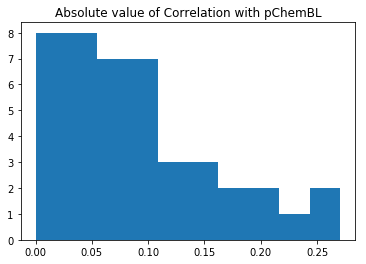

In [20]:
corr = df.corr()
plt.title('Absolute value of Correlation with pChemBL')
plt.hist((corr.iloc[:len(corr)-1,len(corr)-1]).abs())

In [21]:
X_train.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
793,0.0,0.690251,0.021995,0.164278,0.264677,0.600000,0.589744,0.229730,0.281250,0.195402,...,0.354404,0.291340,0.670050,0.288923,0.211226,0.243160,0.073062,0.414894,0.480536,0.328947
812,0.0,0.757843,0.004213,0.299756,0.293803,0.342857,0.333333,0.290541,0.265625,0.310345,...,0.163506,0.276542,0.697791,0.266856,0.110013,0.378410,0.061018,0.382979,0.452951,0.309211
2117,0.0,0.704169,0.017196,0.233240,0.279979,0.485714,0.461538,0.263514,0.265625,0.264368,...,0.202127,0.275598,0.680400,0.266038,0.000000,0.485928,0.065244,0.319149,0.480773,0.296053
2592,0.0,0.785380,0.000957,0.261839,0.239733,0.342857,0.333333,0.236486,0.265625,0.218391,...,0.355729,0.263676,0.460745,0.392879,0.155458,0.304828,0.052801,0.393617,0.452478,0.315789
105,0.0,0.859124,0.003608,0.123687,0.110753,0.342857,0.333333,0.114865,0.125000,0.114943,...,0.436102,0.112834,0.273581,0.218650,0.061475,0.168631,0.021670,0.127660,0.565657,0.111842


<h3>Best Model</h3>

In [22]:
X_final, validate = np.split(df.sample(frac=1), [int(.8*len(df))])
model2 = RandomForestRegressor(n_estimators= 250)
X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)
model2.fit(X_train,y_train)
r_square = model2.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model2.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = model2.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])
rmse = np.sqrt(mean_squared_error(validate['pChemBL'],model2.predict(validate.drop(columns=['pChemBL'],inplace=False))))
print("Validation set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.7992968593505826	 R^2 = 0.5615073769517446
Validation set results
RMSE = 0.7984421641469256	 R^2 = 0.5545949098685425


In [23]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
r_square = model1.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model1.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.9466475251498222	 R^2 = 0.3849326324666583


In [16]:
y1 = model1.predict(X_train)
y2 = model2.predict(X_train)
x = np.ndarray(shape = (len(y1),2),dtype='float64')
x[:,0] = y1
x[:,1] = y2

In [17]:
X_lol = pd.DataFrame(data=x)
X_lol.head()

,0,1
0,7.358942,7.288336
1,6.731463,6.530600
2,6.569677,6.421960
3,7.814387,7.611800
4,7.168164,7.361480


In [18]:
ensemble = LinearRegression(fit_intercept=False)
ensemble.fit(x,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [19]:
y1 = model1.predict(X_test)
y2 = model2.predict(X_test)
x = np.ndarray(shape = (len(y1),2),dtype='float64')
x[:,0] = y1
x[:,1] = y2
ensemble.score(x,y_test)

0.3675821440162781

In [20]:
ensemble.coef_

array([-0.30761226,  1.30861765])

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

encoding_dim = 256
inputs = Input(shape=(1210,))

#hidden1 = Dense(600,activation='relu',activity_regularizer=regularizers.l2(10e-5))(inputs)
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l2(10e-7))(inputs)#(inputs)(hidden1)
#hidden2 = Dense(600,activation='relu',activity_regularizer=regularizers.l2(10e-5))(encoded)

decoded = Dense(1210, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(inputs, decoded)

Using TensorFlow backend.



<h2>Trials</h2>

In [23]:
X = pd.read_csv('./no_zeros_no_chembl.csv')
y = X['pChemBL']
X.drop(columns='pChemBL',inplace=True)
x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(data=x_scaled,columns=X.columns)
X['pChemBL']=y
correlation_matrix = X.astype('float64').corr()
bad_cols_index = []
for cols in range(len(corr)-2):
    if correlation_matrix.abs().iloc[cols][len(corr)-1] < 0.05:
        bad_cols_index.append(cols)
print(len(bad_cols_index))
bad_cols = []
cols = X.columns
for index in bad_cols_index:
    bad_cols.append(cols[index])
len(bad_cols)
bad_cols.append('pChemBL')
X.drop(columns = bad_cols, inplace = True)

82


In [36]:
X_test.head()

,Unnamed: 0,Unnamed: 0.1,nAcid,ALogp2,nC,nN,nO,nS,nP,nF,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
988,0.345455,0.345455,0.0,0.032412,0.479167,0.388889,0.166667,0.0,0.0,0.000000,...,0.181543,0.400511,0.364307,0.306419,0.153322,0.391248,0.151078,0.393617,0.709847,0.381579
2655,0.928322,0.928322,0.0,0.003754,0.270833,0.388889,0.111111,0.0,0.0,0.285714,...,0.229464,0.265334,0.491298,0.382847,0.118768,0.437059,0.056135,0.351064,0.425542,0.309211
2025,0.708042,0.708042,0.0,0.000055,0.229167,0.222222,0.166667,0.0,0.0,0.142857,...,0.361431,0.205052,0.569659,0.290269,0.162192,0.258935,0.040053,0.297872,0.418454,0.230263
1277,0.446503,0.446503,0.0,0.035239,0.270833,0.444444,0.111111,0.0,0.0,0.000000,...,0.262630,0.261133,0.715705,0.348945,0.107253,0.496535,0.056909,0.351064,0.432985,0.289474
1337,0.467483,0.467483,0.0,0.007305,0.187500,0.444444,0.055556,0.0,0.0,0.000000,...,0.340764,0.176763,0.659872,0.305215,0.055561,0.486120,0.030427,0.223404,0.436706,0.190789


In [37]:
encoding_dim = 256
inputs = Input(shape=(1128,))

#hidden1 = Dense(600,activation='relu',activity_regularizer=regularizers.l2(10e-5))(inputs)
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l2(10e-7))(inputs)#(inputs)(hidden1)
#hidden2 = Dense(600,activation='relu',activity_regularizer=regularizers.l2(10e-5))(encoded)

decoded = Dense(1128, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder2 = Model(inputs, decoded)

encoder2 = Model(inputs,encoded)
encoded_input2 = Input(shape=(encoding_dim,))
decoder_layer2 = autoencoder.layers[-1]
decoder2 = Model(encoded_input,decoder_layer(encoded_input))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,X,random_state=101)

In [39]:
autoencoder2.compile(optimizer='adagrad', loss=tf.keras.losses.MeanSquaredError())

In [41]:
autoencoder2.fit(X_train, X_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 2145 samples, validate on 716 samples
Epoch 1/200
2145/2145 [==============================] - 0s 118us/step - loss: 0.0086 - val_loss: 0.0086
Epoch 2/200
2145/2145 [==============================] - 0s 108us/step - loss: 0.0086 - val_loss: 0.0085
Epoch 3/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0085 - val_loss: 0.0085
Epoch 4/200
2145/2145 [==============================] - 0s 126us/step - loss: 0.0085 - val_loss: 0.0085
Epoch 5/200
2145/2145 [==============================] - 0s 118us/step - loss: 0.0085 - val_loss: 0.0085
Epoch 6/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0085 - val_loss: 0.0085
Epoch 7/200
2145/2145 [==============================] - 0s 133us/step - loss: 0.0084 - val_loss: 0.0084
Epoch 8/200
2145/2145 [==============================] - 0s 126us/step - loss: 0.0084 - val_loss: 0.0084
Epoch 9/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0084 - val_loss: 0.0084
Epoch 10

Epoch 78/200
2145/2145 [==============================] - 0s 126us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 79/200
2145/2145 [==============================] - 0s 108us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 80/200
2145/2145 [==============================] - 0s 118us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 81/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0072 - val_loss: 0.0073
Epoch 82/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0072 - val_loss: 0.0072
Epoch 83/200
2145/2145 [==============================] - 0s 118us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 84/200
2145/2145 [==============================] - 0s 118us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 85/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0071 - val_loss: 0.0071
Epoch 86/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0071 - val_loss: 0.0071
Epoch 87/200
2145/2145 [======================

Epoch 155/200
2145/2145 [==============================] - 0s 126us/step - loss: 0.0064 - val_loss: 0.0065
Epoch 156/200
2145/2145 [==============================] - 0s 126us/step - loss: 0.0064 - val_loss: 0.0065
Epoch 157/200
2145/2145 [==============================] - 0s 123us/step - loss: 0.0064 - val_loss: 0.0065
Epoch 158/200
2145/2145 [==============================] - 0s 118us/step - loss: 0.0064 - val_loss: 0.0065
Epoch 159/200
2145/2145 [==============================] - 0s 115us/step - loss: 0.0064 - val_loss: 0.0064
Epoch 160/200
2145/2145 [==============================] - 0s 111us/step - loss: 0.0064 - val_loss: 0.0064
Epoch 161/200
2145/2145 [==============================] - 0s 123us/step - loss: 0.0063 - val_loss: 0.0064
Epoch 162/200
2145/2145 [==============================] - 0s 126us/step - loss: 0.0063 - val_loss: 0.0064
Epoch 163/200
2145/2145 [==============================] - 0s 147us/step - loss: 0.0063 - val_loss: 0.0064
Epoch 164/200
2145/2145 [============

In [15]:
X_encoded = encoder2.predict(X)

NameError: name 'encoder2' is not defined

In [16]:
df = pd.DataFrame(data=X_encoded)
df['pChemBL'] = y
df.head()

NameError: name 'X_encoded' is not defined

In [44]:
variance = df.astype(dtype='float64').var(axis=0,ddof=0,skipna= True)
means = df.astype(dtype='float64').abs().sum(axis=0)/2861
bad_cols = []
for cols in means.index:
    if means[cols] == 0:
        bad_cols.append(cols)
print(len(bad_cols))
df.drop(columns = bad_cols, inplace=True)
means.drop(labels = bad_cols,inplace = True)
variance.drop(labels = bad_cols,inplace = True)

209


(array([ 7., 12., 14.,  6.,  3.,  0.,  3.,  0.,  1.,  1.]),
 array([0.0078475 , 0.04260588, 0.07736425, 0.11212263, 0.146881  ,
        0.18163938, 0.21639775, 0.25115613, 0.2859145 , 0.32067288,
        0.35543125]),
 <a list of 10 Patch objects>)

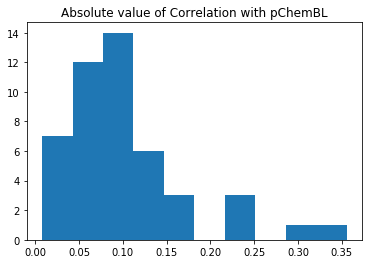

In [45]:
corr = df.corr()
plt.title('Absolute value of Correlation with pChemBL')
plt.hist((corr.iloc[:len(corr)-1,len(corr)-1]).abs())

In [53]:
df.shape

(2861, 48)

In [14]:
X_final, validate = np.split(df.sample(frac=1), [int(.8*len(df))])
model2 = RandomForestRegressor(n_estimators= 250)
X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)
model2.fit(X_train,y_train)
r_square = model2.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model2.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = model2.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])
rmse = np.sqrt(mean_squared_error(validate['pChemBL'],model2.predict(validate.drop(columns=['pChemBL'],inplace=False))))
print("Validation set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

NameError: name 'df' is not defined

In [55]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
r_square = model1.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model1.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.9185014328478752	 R^2 = 0.4244616369089673


In [12]:
import numpy as np
if ([True ,True]) == [1,1]:
    print('!')

!


In [13]:
[False]*2

[False, False]